Physics projectile

Expected max height: 15.29 m  from numpy  15.29 m   10.19
Expected range :  70.71 m   50.00 m
Time of flight :  2.88 s
Time of flight :  3.53 s


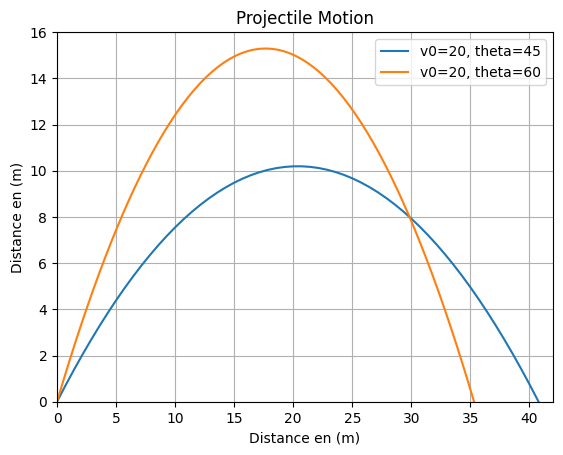

In [2]:
import numpy as np
import matplotlib.pyplot as plt


g = 9.81   #gravity
v0 = 20   #initial velocity
theta1 = 45   #angle in degrees
t = np.linspace(0, 5, 100)  #time array
x = v0 * np.cos(np.radians(theta1)) * t
y = v0 * np.sin(np.radians(theta1)) * t - 0.5 * g * t**2

time_of_flight1 = v0 * np.sin(np.radians(theta1)) / (0.5 * g)


g = 9.81   #gravity
v0 = 20   #initial velocity
theta2 = 60   #angle in degrees
t = np.linspace(0, 5, 100)  #time array
x2 = v0 * np.cos(np.radians(theta2)) * t
y2 = v0 * np.sin(np.radians(theta2)) * t - 0.5 * g * t**2

time_of_flight2 = v0 * np.sin(np.radians(theta2)) / (0.5 * g)

# Physics check (analytical max height and range)
max_height = (v0 * np.sin(np.radians(theta2)))**2 / (2 * g)
range_x = (v0**2 * np.sin(2 * np.radians(theta2))) / g
print(f"Expected max height: {max_height:.2f} m  from numpy {y2.max(): .2f} m  {y.max(): .2f}")
print(f"Expected range : {x.max(): .2f} m  {x2.max(): .2f} m")
print(f"Time of flight : {time_of_flight1: .2f} s")
print(f"Time of flight : {time_of_flight2: .2f} s")



#plot with fixed axes
plt.plot(x, y, label="v0=20, theta=45")
plt.plot(x2, y2, label="v0=20, theta=60")
plt.title("Projectile Motion")
plt.xlabel("Distance en (m)")
plt.ylabel("Distance en (m)")
plt.grid(True)
plt.xlim(0, 42)
plt.ylim(0, 16)
plt.legend()
plt.show()

In [1]:
import sys
print(sys.executable)


/usr/bin/python3.8


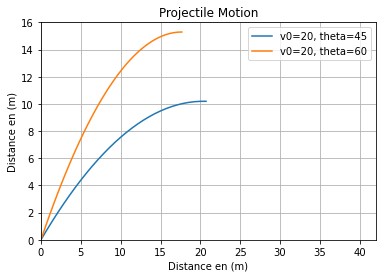

In [53]:
#plot the half curve
max = y2.max()
i, = np.where(y2 == max)
max_index2 = i[0]

max = y.max()
i, = np.where(y == max)
max_index = i[0]

hx2 = x2[:36]
hy2 = y2[:36]

hx = x[: max_index + 1]
hy = y[: max_index + 1]

#plot with fixed axes
plt.plot(hx, hy, label="v0=20, theta=45")
plt.plot(hx2, hy2, label="v0=20, theta=60")
plt.title("Projectile Motion")
plt.xlabel("Distance en (m)")
plt.ylabel("Distance en (m)")
plt.grid(True)
plt.xlim(0, 42)
plt.ylim(0, 16)
plt.legend()
plt.show()

# Numpy

In [28]:
import numpy as np
a = np.arange(15).reshape(3, 5)
# print(type(a))

b = np.linspace(1, 4, 7)
# print("Get 7 elements array between 1 and 7", b)

c = np.arange(0, 45, 5)
# print("Get array of numbers between 0 and 45 by adding 5 every time", c)


# Basic operations
# element wise operations
# print("substract 2 from every element in c ", c - 2)

# Boolean operations
# print("Which elements in c are greater than 20", c > 20)

# Indexing, Slicing and Iterating
a = np.arange(10)**3
# a[:6:2] = 1000
a[::-1]

array([729, 512, 343, 216, 125,  64,  27,   8,   1,   0])

Pandas

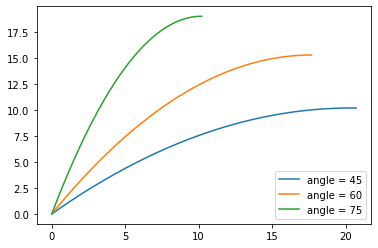

In [16]:
import pandas as pd

arr = np.column_stack((t, x, y))

df1 = pd.DataFrame(arr, columns = ["time", "x positions", "y positions"])

df1["angle"] = theta1

arr2 = np.column_stack((t, x2, y2))

df2 = pd.DataFrame(arr2, columns = ["time", "x positions", "y positions"])

df2["angle"] = theta2

df = pd.concat([df1, df2], axis = 0)

df.describe()

df[df["y positions"] > 0]

df.groupby("angle").max()

max_idx1 = df[df["angle"] == 45]["y positions"].idxmax()
max_idx2 = df[df["angle"] == 60]["y positions"].idxmax()

df1_half = df[df["angle"] == 45].iloc[:max_idx1 + 1]
df2_half = df[df["angle"] == 60].iloc[:max_idx2 + 1]

plt.plot(df1_half["x positions"], df1_half["y positions"], label = f"angle = {theta1}")
plt.plot(df2_half["x positions"], df2_half["y positions"], label = f"angle = {theta2}")

# another angle

g = 9.81   #gravity
v0 = 20   #initial velocity
theta3 = 75   #angle in degrees
t = np.linspace(0, 5, 100)  #time array
x3 = v0 * np.cos(np.radians(theta3)) * t
y3 = v0 * np.sin(np.radians(theta3)) * t - 0.5 * g * t**2

arr3 = np.column_stack((t, x3, y3))
df3 = pd.DataFrame(arr3, columns = ["time", "x positions", "y positions"])
df3["angle"] = theta3
df = pd.concat([df, df3], axis = 0)
max_idx3 = df[df["angle"] == theta3]["y positions"].idxmax()
df3_half = df[df["angle"] == theta3].iloc[:max_idx3 + 1]
plt.plot(df3_half["x positions"], df3_half["y positions"], label = f"angle = {theta3}")
plt.legend()

Simple Linear regression

In [28]:
import numpy as np
import pandas as pd


# Constants
v0 = 20
g = 9.81

# Generate angles (e.g., 10° to 80° in steps of 5°)
angles = np.arange(10, 85, 0.5)  # 15 angles
ranges = (v0**2 * np.sin(2 * np.radians(angles))) / g  # Analytical range

# Create DataFrame
df = pd.DataFrame({"angle": angles, "range": ranges})
df.describe()

,angle,range
count,150.000000,150.000000
mean,47.250000,29.995824
std,21.722684,9.431344
min,10.000000,7.780183
25%,28.625000,22.800934
50%,47.250000,32.347528
75%,65.875000,38.553255
max,84.500000,40.774720


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Features (X) and target (y)
X = df[["angle"]]  # 2D array for scikit-learn
y = df["range"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model_L = LinearRegression()
model_L.fit(X_train, y_train)

# Predict
y_pred = model_L.predict(X_test)

linear_R = model_L.score(X_test, y_test)
# Score (R²: how well it fits)
print("R² score:", model_L.score(X_test, y_test))
# print("Predicted vs Actual:")
# for angle, pred, actual in zip(X_test["angle"], y_pred, y_test):
#     print(f"Angle: {angle}°, Predicted: {pred:.2f} m, Actual: {actual:.2f} m")

R² score: 0.10235562280455224


In [33]:
df['range'].max()

40.77471967380224

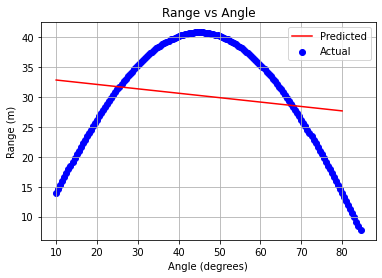

In [38]:
# Predict over all angles for smooth curve
X_all = np.linspace(10, 80, 100).reshape(-1, 1)  # 2D array
y_all_pred = model_L.predict(X_all)

plt.scatter(df["angle"], df["range"], color="blue", label="Actual")
plt.plot(X_all, y_all_pred, color="red", label="Predicted")
plt.title("Range vs Angle")
plt.xlabel("Angle (degrees)")
plt.ylabel("Range (m)")
plt.legend()
plt.grid(True)
plt.show()

In [27]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # Quadratic fit
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train_poly, y_train)
print("Polynomial R²:", model.score(X_test_poly, y_test))
print("Linear R²:", linear_R)

Polynomial R²: 0.9982374473672339
Linear R²: 0.10824494288886632


In [10]:
X1 = 45
X1_poly = poly.fit_transform([[X1]])
model.predict(X1_poly)

array([40.3349998])

Multifeatures regression

In [2]:
import numpy as np
import pandas as pd

# Constants
g = 9.81

# Variables
v0s = np.arange(0, 90, 1)  # Velocities (m/s)
angles = np.arange(10, 85, 0.5)  # Angles (degrees)

# Generate data
data = []
for v in v0s:
    for theta in angles:
        r = (v**2 * np.sin(2 * np.radians(theta))) / g
        data.append([v, theta, r])
df = pd.DataFrame(data, columns=["velocity", "angle", "range"])

print("Data peek:\n", df.head())
print("Stats:\n", df.describe())

Data peek:
    velocity  angle  range
0         0   10.0    0.0
1         0   10.5    0.0
2         0   11.0    0.0
3         0   11.5    0.0
4         0   12.0    0.0
Stats:
            velocity         angle         range
count  13500.000000  13500.000000  13500.000000
mean      44.500000     47.250000    199.109777
std       25.980121     21.650956    197.891231
min        0.000000     10.000000      0.000000
25%       22.000000     28.500000     32.620899
50%       44.500000     47.250000    133.453742
75%       67.000000     66.000000    315.655283
max       89.000000     84.500000    807.441386


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Features and target
X = df[["velocity", "angle"]]
y = df["range"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
print("R²:", model.score(X_test, y_test))
print("Test predictions:")
for i in range(5):
    v, theta = X_test.iloc[i]
    pred = model.predict([[v, theta]])[0]
    actual = y_test.iloc[i]
#     print(f"v={v}, θ={theta}°: Predicted {pred:.2f} m, Actual {actual:.2f} m")

R²: 0.7814753499540383
Test predictions:


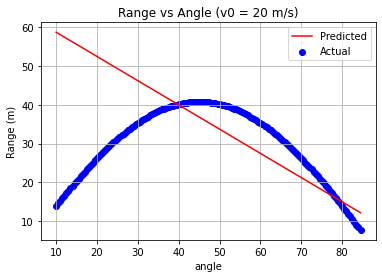

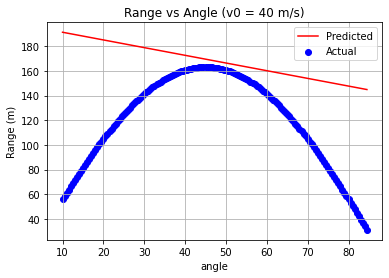

v=22, θ=50°: 191.31455723957978


In [26]:
import matplotlib.pyplot as plt

def plot_this(tobefixed, value, tobeploted, title):
    # Plot for v0 = 20
    df_v20 = df[df[tobefixed] == value]
    plt.scatter(df_v20[tobeploted], df_v20["range"], color="blue", label="Actual")
    plt.plot(df_v20[tobeploted], model.predict(df_v20[["velocity", "angle"]]), color="red", label="Predicted")
    plt.title(title)
    plt.xlabel(f"{tobeploted}")
    plt.ylabel("Range (m)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_this("velocity", 20, "angle", "Range vs Angle (v0 = 20 m/s)")
plot_this("velocity", 40, "angle", "Range vs Angle (v0 = 40 m/s)")
# Stretch: Predict a new point
print("v=22, θ=50°:", model.predict([[40, 10]])[0])

In [22]:
# After training the model
print("Intercept (β0):", model.intercept_)
print("Coefficients (β1, β2, ...):", model.coef_)

Intercept (β0): -67.81560067208139
Coefficients (β1, β2, ...): [ 6.6340656  -0.62324662]


Will range exceed 30 m

Accuracy: 0.9574074074074074
Sample predictions:
v=9.0, θ=76.5°: Predicted 0, Actual 0
v=85.0, θ=81.0°: Predicted 1, Actual 1
v=7.0, θ=72.5°: Predicted 0, Actual 0
v=43.0, θ=62.0°: Predicted 1, Actual 1
v=73.0, θ=54.5°: Predicted 1, Actual 1


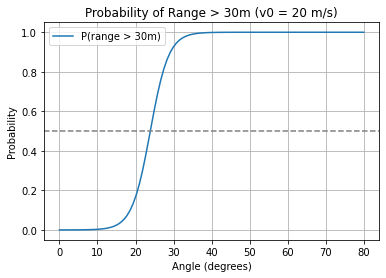

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Constants
g = 9.81

# Variables
v0s = np.arange(0, 90, 1)  # Velocities (m/s)
angles = np.arange(10, 85, 0.5)  # Angles (degrees)

# Generate data
data = []
for v in v0s:
    for theta in angles:
        r = (v**2 * np.sin(2 * np.radians(theta))) / g
        data.append([v, theta, r])
df = pd.DataFrame(data, columns=["velocity", "angle", "range"])


# Add target column
df["exceeds_30m"] = (df["range"] > 30).astype(int)  # 1 = yes, 0 = no

# Model
X = df[["velocity", "angle"]]
y = df["exceeds_30m"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate
print("Accuracy:", clf.score(X_test, y_test))
print("Sample predictions:")
for i in range(5):
    v, theta = X_test.iloc[i]
    pred = clf.predict([[v, theta]])[0]
    actual = y_test.iloc[i]
    print(f"v={v}, θ={theta}°: Predicted {pred}, Actual {actual}")

# Decision boundary (v0 = 20)
angles = np.linspace(10, 80, 100)
probs = clf.predict_proba(np.c_[20 * np.ones(100), angles])[:, 1]  # Probability of >30m
plt.plot(angles, probs, label="P(range > 30m)")
plt.axhline(0.5, color="gray", linestyle="--")
plt.title("Probability of Range > 30m (v0 = 20 m/s)")
plt.xlabel("Angle (degrees)")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.savefig("day4_prob_v20.png")
plt.show()

Features: ['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']
Accuracy: 0.7777777777777778
Coefficients: {'x0': -0.0004427456950223073, 'x1': 0.4658519038441221, 'x0^2': -0.017262593150845374, 'x0 x1': 0.5431910448184234, 'x1^2': -0.1490102920372348}


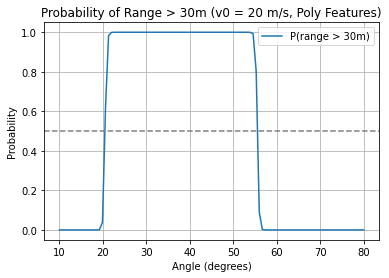

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Data (unchanged)
g = 9.81
v0s = [15, 20, 25]
angles = np.arange(10, 85, 5)
data = [[v, theta, (v**2 * np.sin(2 * np.radians(theta))) / g] for v in v0s for theta in angles]
df = pd.DataFrame(data, columns=["velocity", "angle", "range"])
df["exceeds_30m"] = (df["range"] > 30).astype(int)

# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)  # angle, velocity, angle², velocity², angle*velocity
X = poly.fit_transform(df[["velocity", "angle"]])
# For older versions, use get_feature_names() or skip naming
try:
    feature_names = poly.get_feature_names_out(["velocity", "angle"])
except AttributeError:
    feature_names = poly.get_feature_names() if hasattr(poly, 'get_feature_names') else ["f0", "f1", "f2", "f3", "f4"]
print("Features:", feature_names)

# Model
y = df["exceeds_30m"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=1000)  # More iterations for convergence
clf.fit(X_train, y_train)

# Accuracy
print("Accuracy:", clf.score(X_test, y_test))
print("Coefficients:", dict(zip(feature_names, clf.coef_[0])))

# Probability plot (v0 = 20)
angles_plot = np.linspace(10, 80, 100)
X_plot = poly.transform(np.c_[20 * np.ones(100), angles_plot])
probs = clf.predict_proba(X_plot)[:, 1]
plt.plot(angles_plot, probs, label="P(range > 30m)")
plt.axhline(0.5, color="gray", linestyle="--")
plt.title("Probability of Range > 30m (v0 = 20 m/s, Poly Features)")
plt.xlabel("Angle (degrees)")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()

Day 5

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import precision_score, recall_score, confusion_matrix, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Data 
g = 9.81
v0s = [15, 20, 25]
angles = np.arange(10, 85, 0.5)
data = [[v, theta, (v**2 * np.sin(2 * np.radians(theta))) / g] for v in v0s for theta in angles]
df = pd.DataFrame(data, columns=["velocity", "angle", "range"])

# # Add new features
# df["time_of_flight"] = (2 * df["velocity"] * np.sin(np.radians(df["angle"]))) / g
# df["max_height"] = (df["velocity"]**2 * (np.sin(np.radians(df["angle"])))**2) / (2 * g)

# df["exceeds_30m"] = (df["range"] > 30).astype(int)

# # Classification eval
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X = poly.fit_transform(df[["velocity", "angle"]])
# y = df["exceeds_30m"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# clf = LogisticRegression(max_iter=1000)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print("Classification Metrics:")
# print("Accuracy:", clf.score(X_test, y_test))
# print("Precision:", precision_score(y_test, y_pred))
# print("Recall:", recall_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# # Regression eval (Day 4 multi-input)
# X_reg = df[["velocity", "angle", "time_of_flight", "max_height"]]
# y_reg = df["range"]
# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
# reg = LinearRegression()
# reg.fit(X_train_reg, y_train_reg)
# y_pred_reg = reg.predict(X_test_reg)
# print("\nRegression Metrics:")
# print("R²:", reg.score(X_test_reg, y_test_reg))
# print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))

# # Create polynomial features (degree=2 for quadratic)
# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X_reg)

# # Split and train
# X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_reg, test_size=0.2, random_state=42)
# reg_poly = LinearRegression()
# reg_poly.fit(X_train_poly, y_train_poly)
# y_pred_poly = reg_poly.predict(X_test_poly)

# Evaluate
# print("\nPolynomial Regression Metrics:")
# print("R²:", reg_poly.score(X_test_poly, y_test_poly))
# print("MSE:", mean_squared_error(y_test_poly, y_pred_poly))

# Add binary target column
target_distance = 30  # Example target distance
df["exceeds_30m"] = (df["range"] > target_distance).astype(int)

# Classification task
X_clf = df[["velocity", "angle"]]
y_clf = df["exceeds_30m"]
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Train and evaluate classification model
clf = LogisticRegression()
clf.fit(X_train_clf, y_train_clf)
y_pred_clf = clf.predict(X_test_clf)

# Evaluate
print("\nClassification Metrics:")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("Precision:", precision_score(y_test_clf, y_pred_clf))
print("Recall:", recall_score(y_test_clf, y_pred_clf))
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))




Classification Metrics:
Accuracy: 0.7666666666666667
Precision: 0.7142857142857143
Recall: 0.6944444444444444
Confusion Matrix:
 [[44 10]
 [11 25]]


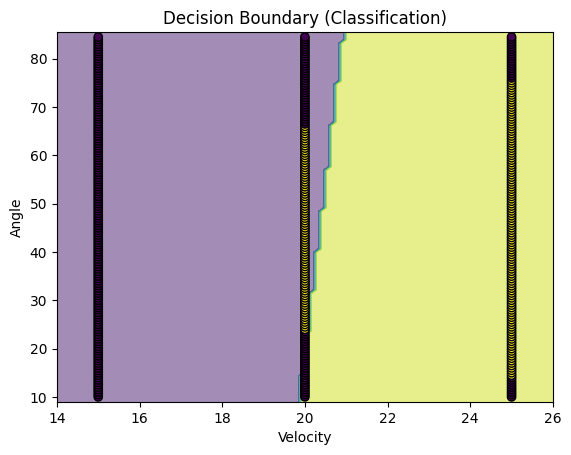

In [2]:
import matplotlib.pyplot as plt
# Visualize decision boundary
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(clf, X_clf, response_method="predict", alpha=0.5)
plt.scatter(X_clf["velocity"], X_clf["angle"], c=y_clf, edgecolors="k")
plt.xlabel("Velocity")
plt.ylabel("Angle")
plt.title("Decision Boundary (Classification)")
plt.show()